In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

In [2]:
# Parámetros
N = 500  
Ni = int(N/2)

np.random.seed(np.random.randint(N))
x = np.random.rand(N,1)
q = np.ones((N,1))
q[:Ni]*=-1
vel = np.random.randn(N,1)/2+2
vel[Ni:]*=-1

Mi = constants.physical_constants['proton mass'][0] #Masa del protón, ión H
me = constants.physical_constants['electron mass'][0] #Masa del electrón
e_c = constants.physical_constants['elementary charge'][0]
epsilon_0 = constants.physical_constants['vacuum electric permittivity'][0]

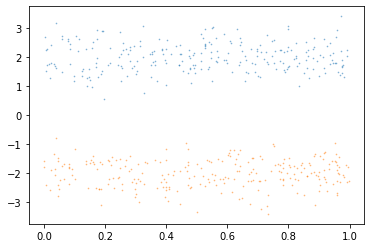

In [3]:
plt.scatter(x[:Ni],vel[:Ni],alpha=0.5,s=0.4)
plt.scatter(x[Ni:],vel[Ni:],alpha=0.5,s=0.4)

In [4]:
def CampoEléctrico(x,q):
    E = np.zeros_like(x)
    k = e_c/(4*np.pi*epsilon_0)
    for iParticle in range(len(x)):
        for jParticle in range(len(x)):
            if jParticle!=iParticle and abs(x[iParticle]-x[jParticle])<0.01:
                E[iParticle] += k*q[jParticle]*(x[iParticle]-x[jParticle])/(x[iParticle]-x[jParticle])**3
            else:
                pass
    
    return E

In [5]:
E = CampoEléctrico(x,q)
E

array([[-3.06073706e-04],
       [-3.74360118e-03],
       [ 2.51548081e-03],
       [-9.95938158e-03],
       [ 3.95796229e-03],
       [-5.91001289e-02],
       [-2.66699265e-04],
       [ 1.41293150e-04],
       [ 1.14612500e+00],
       [ 7.43095017e-04],
       [-2.10334915e-04],
       [-1.07293538e-04],
       [-7.75225609e-04],
       [ 4.49069255e-03],
       [ 5.47835009e-04],
       [ 1.52970927e-04],
       [ 1.30161623e-03],
       [-7.00273073e-02],
       [-6.17957954e-05],
       [-1.16753248e-04],
       [-9.57365523e-03],
       [-2.35181688e-04],
       [ 1.21281290e-04],
       [ 5.85407911e-03],
       [-1.04139716e-02],
       [-4.79859524e-04],
       [ 2.37298129e-04],
       [-4.50264754e-03],
       [-4.33849323e-04],
       [ 9.52171297e-04],
       [ 3.76257228e-01],
       [-2.56476347e+01],
       [-6.46882991e-04],
       [-1.94827557e-01],
       [-3.89406169e-04],
       [ 2.83276091e-03],
       [-1.00422921e-04],
       [ 6.27806268e-03],
       [ 1.5

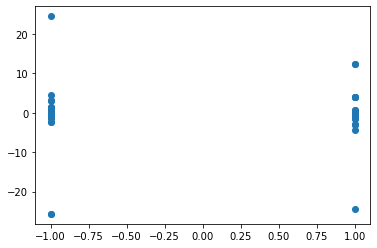

In [6]:
plt.scatter(q,E)

In [7]:
def Aceleración(E,q):
    a = np.zeros_like(E)
    a=E*q*e_c/Mi
    return a

In [8]:
def Aceleración_2P(E,q):
    a = np.zeros_like(E)
    a[:Ni] = E[:Ni]*q[:Ni]*e_c/me
    a[Ni:] = E[Ni:]*q[Ni:]*e_c/Mi
    return a

In [9]:
a = Aceleración(E,q)
a

array([[ 2.93182897e+04],
       [ 3.58593311e+05],
       [-2.40953709e+05],
       [ 9.53992545e+05],
       [-3.79126604e+05],
       [ 5.66110274e+06],
       [ 2.55466776e+04],
       [-1.35342351e+04],
       [-1.09785402e+08],
       [-7.11798319e+04],
       [ 2.01476306e+04],
       [ 1.02774690e+04],
       [ 7.42575676e+04],
       [-4.30155947e+05],
       [-5.24762015e+04],
       [-1.46528298e+04],
       [-1.24679647e+05],
       [ 6.70779893e+06],
       [ 5.91931614e+03],
       [ 1.11835989e+04],
       [ 9.17044461e+05],
       [ 2.25276615e+04],
       [-1.16173325e+04],
       [-5.60752471e+05],
       [ 9.97536966e+05],
       [ 4.59649432e+04],
       [-2.27303919e+04],
       [ 4.31301096e+05],
       [ 4.15577028e+04],
       [-9.12068999e+04],
       [-3.60410521e+07],
       [ 2.45674414e+09],
       [ 6.19638424e+04],
       [ 1.86622066e+07],
       [ 3.73005673e+04],
       [-2.71345442e+05],
       [ 9.61934408e+03],
       [-6.01365150e+05],
       [-1.5

In [10]:
def LoopPrincipal():
    N = 500
    Ni = int(N/2)

    np.random.seed(np.random.randint(N))
    x = np.random.rand(N,1)
    q = np.ones((N,1))
    q[:Ni]*=-1
    vel = np.random.randn(N,1)+0
    vel[Ni:]*=-1
    vel *= (1 + 0.2*np.sin(2*np.pi*x/50))
    
    Mi = constants.physical_constants['proton mass'][0] #Masa del protón, ión H
    me = constants.physical_constants['electron mass'][0] #Masa del electrón
    e_c = constants.physical_constants['elementary charge'][0]
    epsilon_0 = constants.physical_constants['vacuum electric permittivity'][0]
    
    t0 = 0
    Nt = 9e-6
    dt = Nt/90
    E = CampoEléctrico(x,q)
    #acc = Aceleración(E,q)
    acc = Aceleración_2P(E,q)
    t = 0
    plt.scatter(x[:Ni],vel[:Ni],alpha=0.5,s=0.4)
    plt.scatter(x[Ni:],vel[Ni:],alpha=0.5,s=0.4)
    plt.axis([0,1,-6,6])
    plt.show()
    a_s = np.zeros_like(E)
    a_s = -0.001*q*e_c/Mi
    #a_s[:Ni] = -0.001*q[:Ni]*e_c/me
    #a_s[Ni:] = -0.001*q[Ni:]*e_c/Mi
    while t<=Nt:
        vel+=acc*dt/2
        x+=vel*dt
        E = CampoEléctrico(x,q)
        acc = Aceleración(E,q) + a_s
        vel+=acc*dt/2
        t+=dt
        plt.cla()
        plt.scatter(x[:Ni],vel[:Ni],s=0.4)
        plt.scatter(x[Ni:],vel[Ni:],s=0.4)
        plt.axis([0,1,-6,6])
        plt.show()

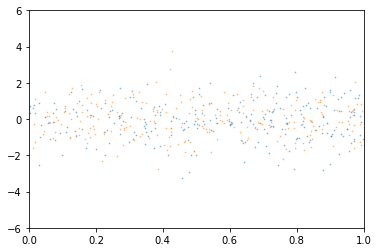

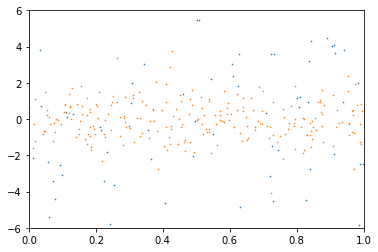

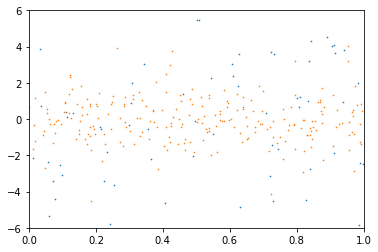

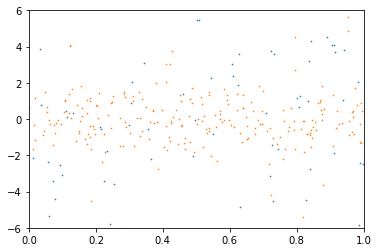

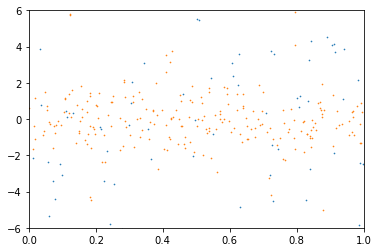

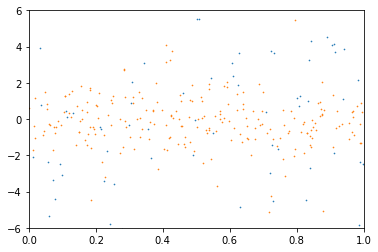

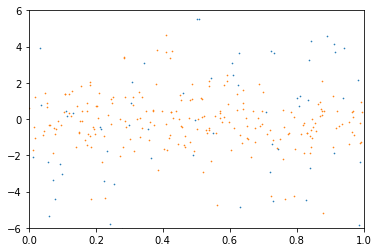

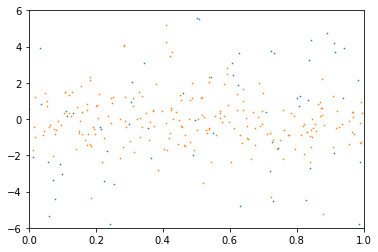

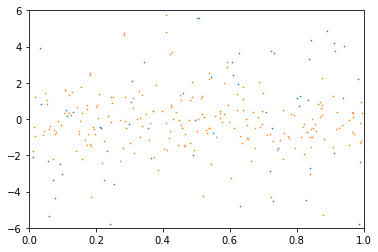

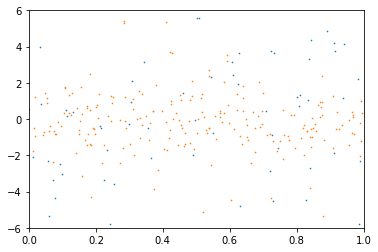

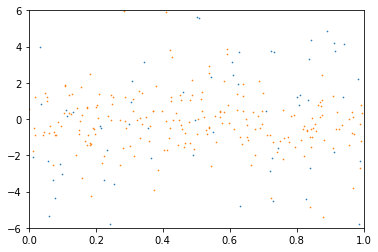

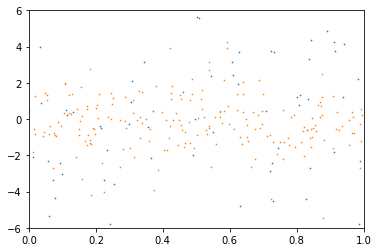

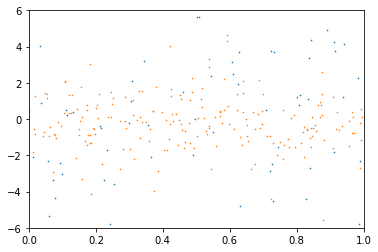

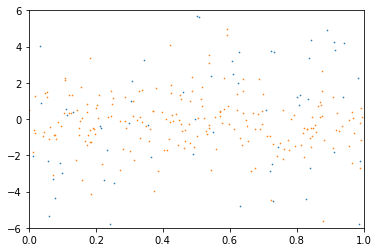

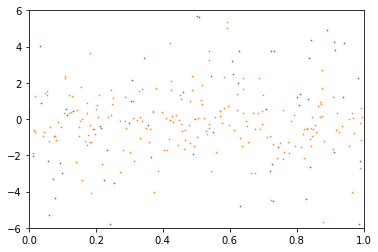

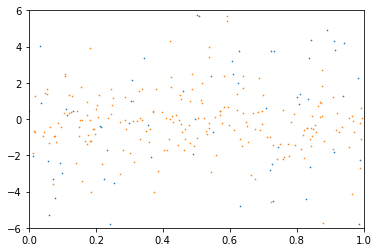

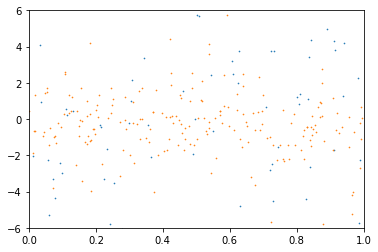

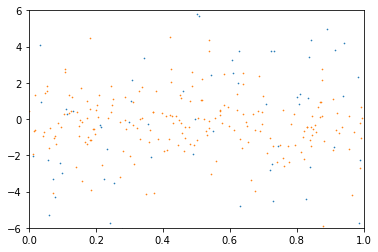

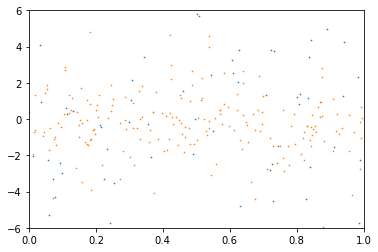

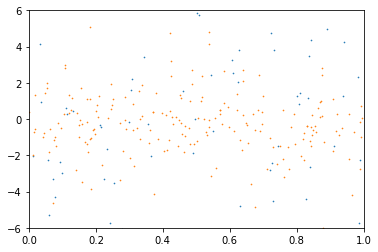

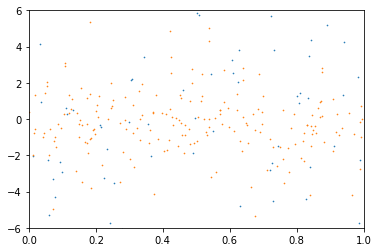

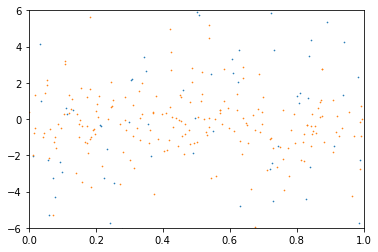

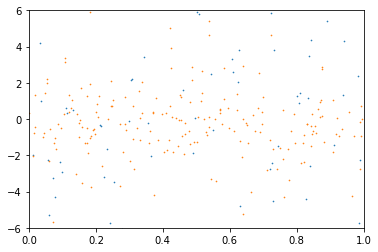

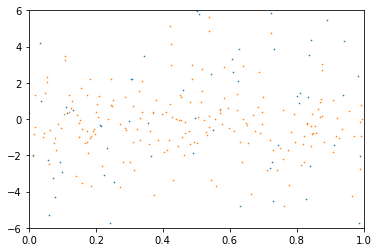

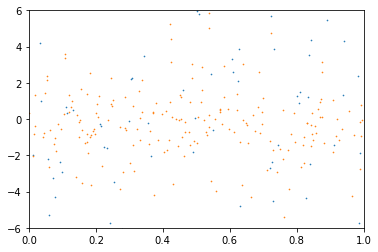

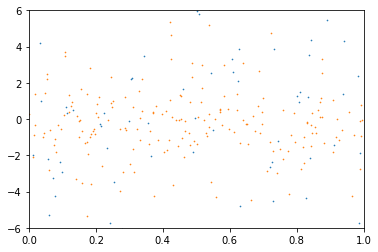

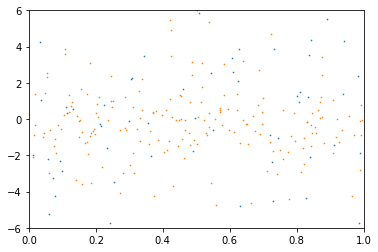

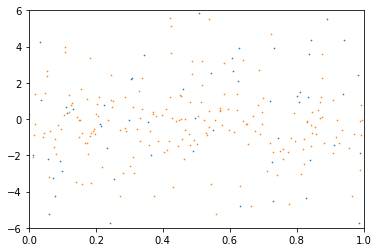

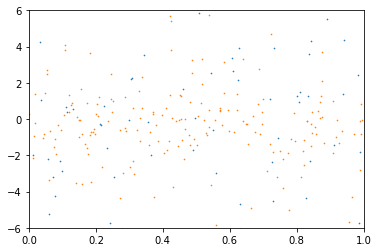

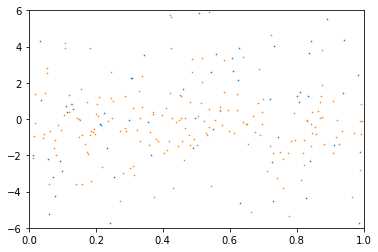

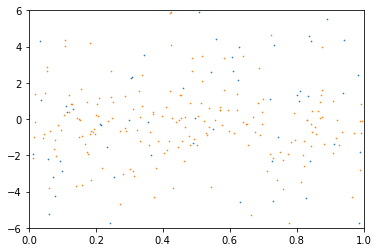

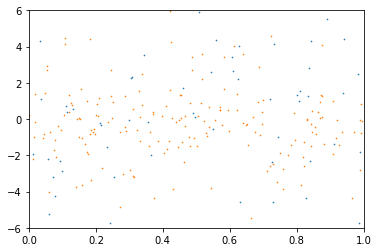

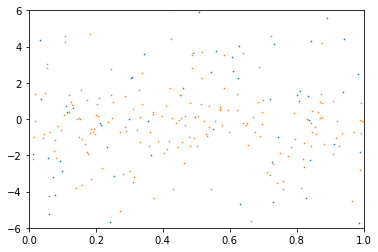

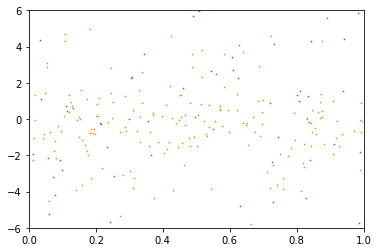

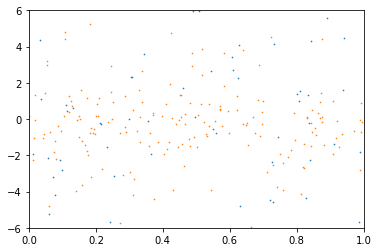

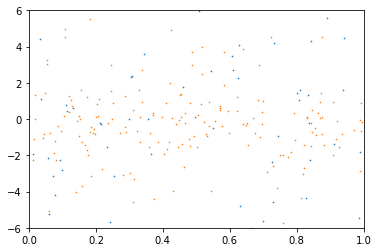

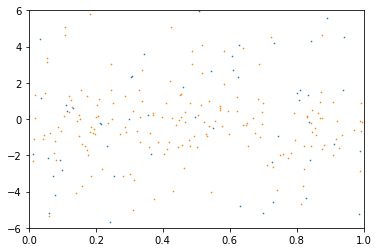

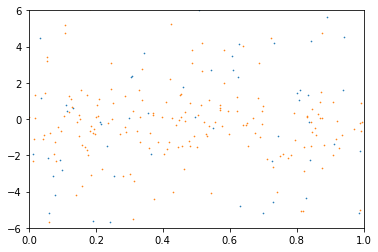

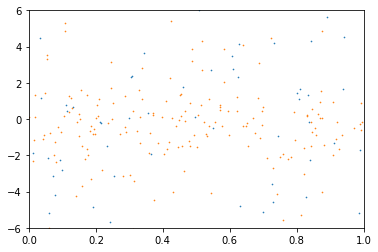

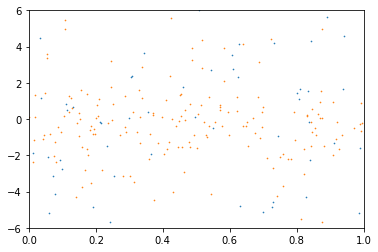

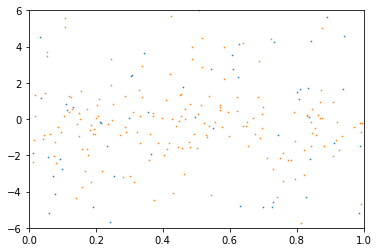

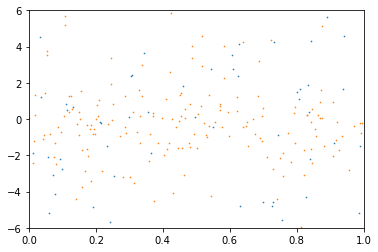

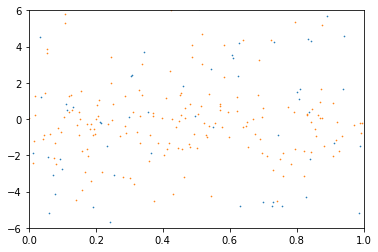

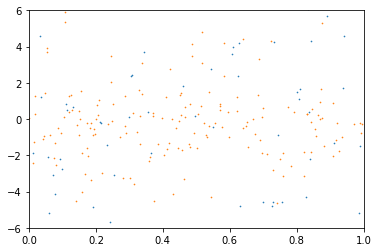

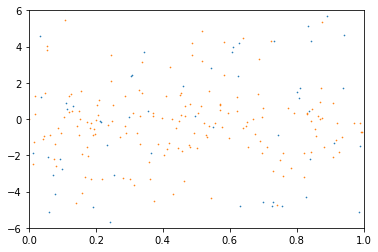

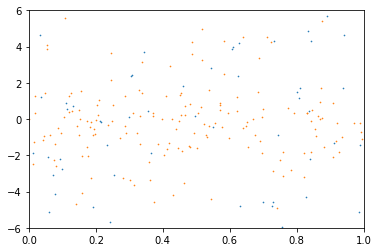

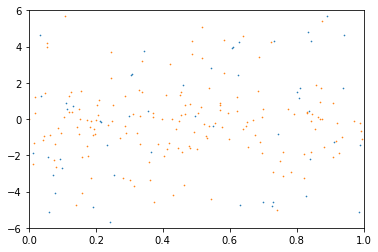

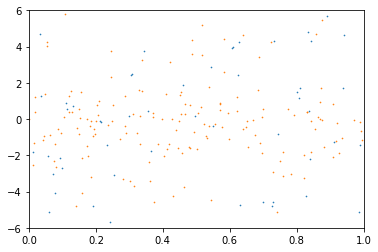

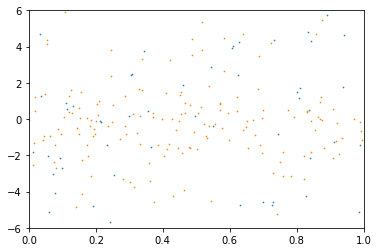

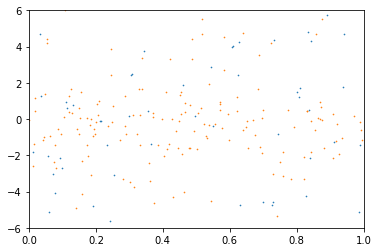

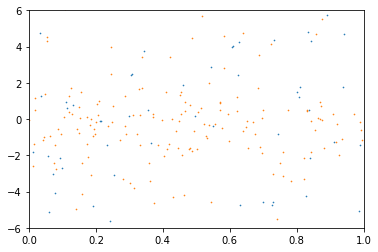

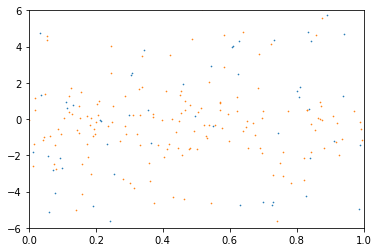

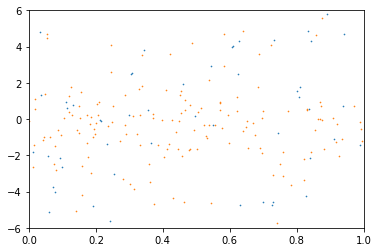

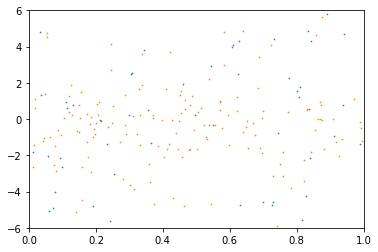

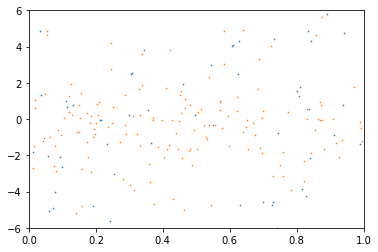

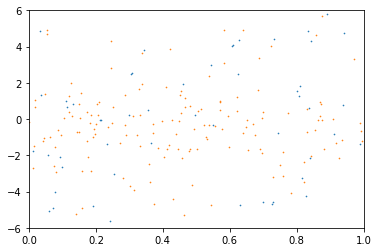

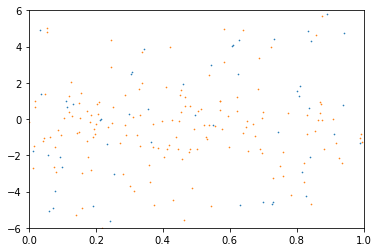

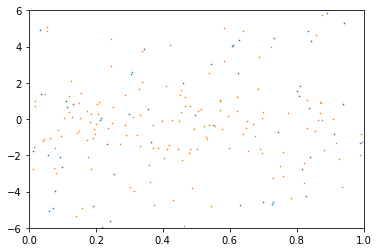

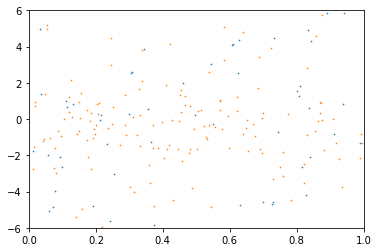

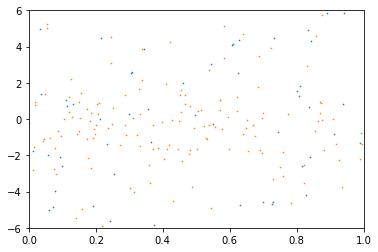

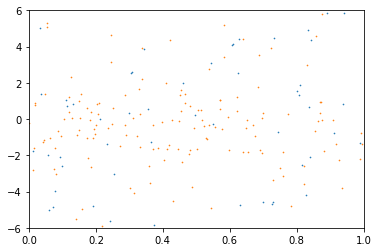

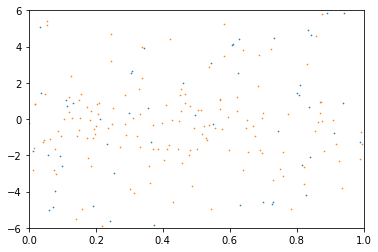

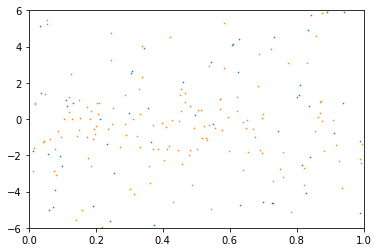

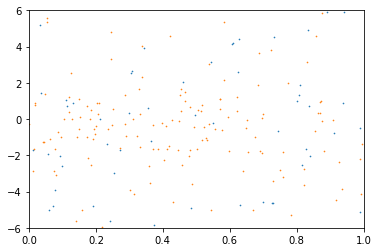

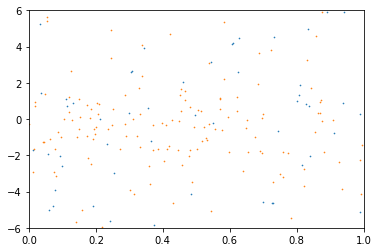

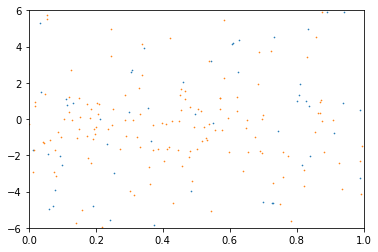

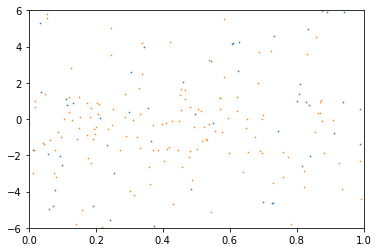

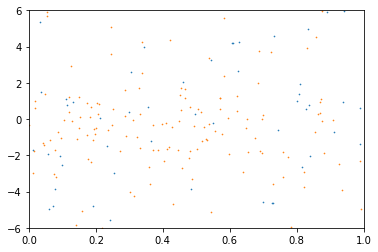

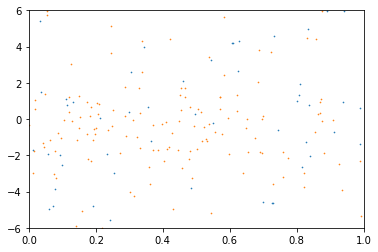

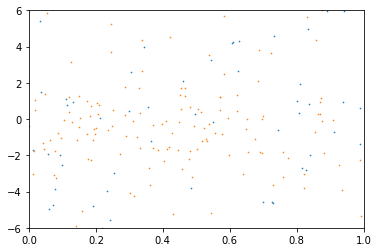

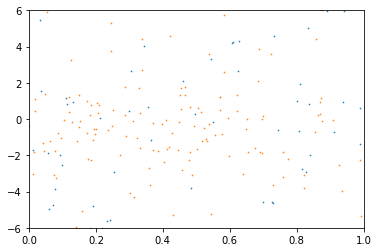

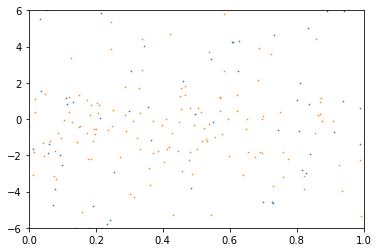

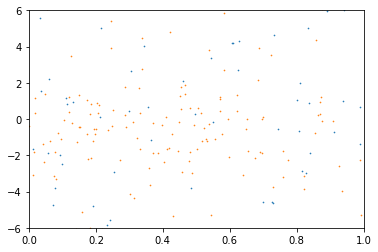

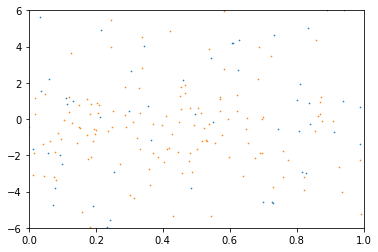

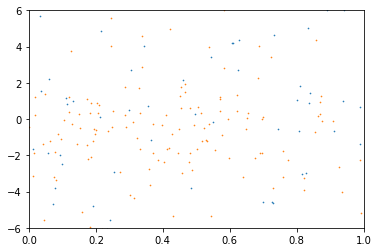

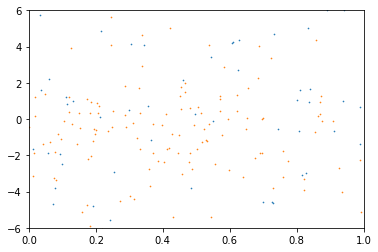

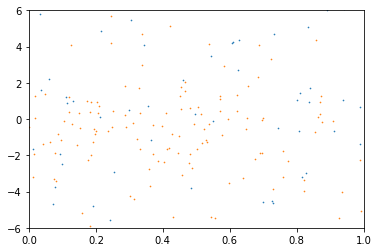

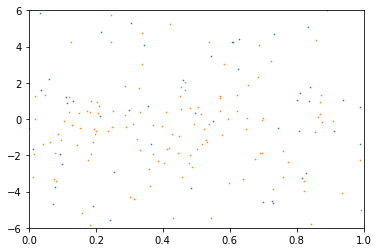

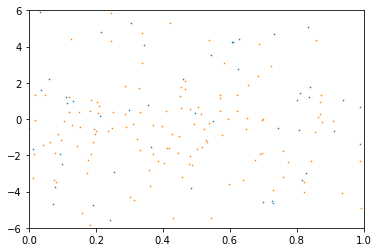

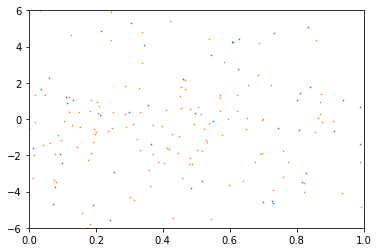

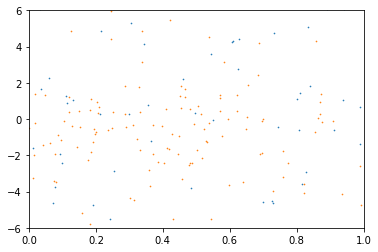

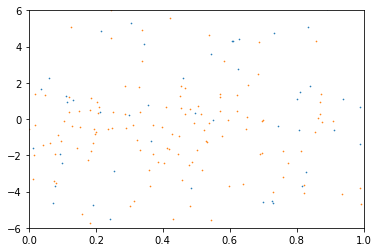

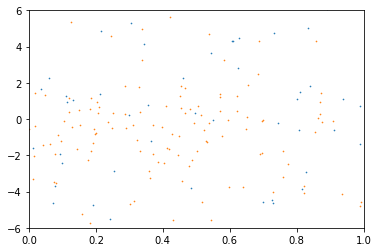

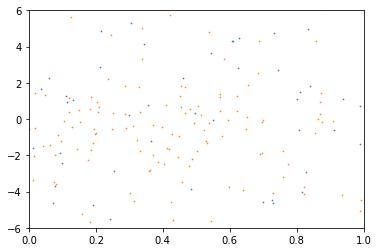

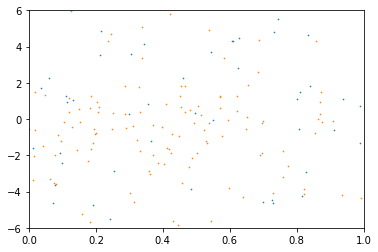

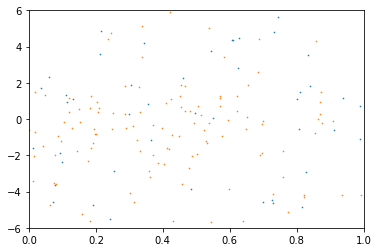

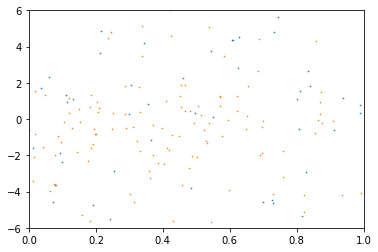

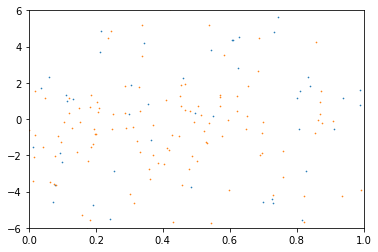

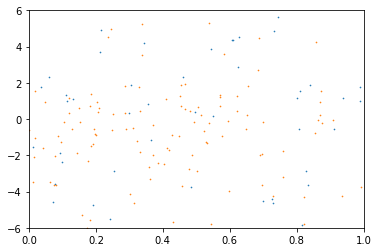

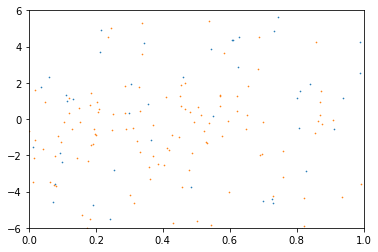

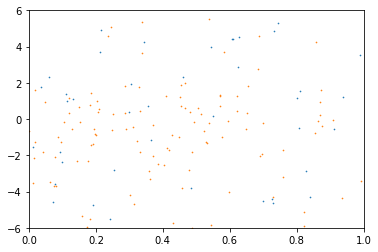

In [11]:
LoopPrincipal()